# Perkenalan

link hugging face: https://huggingface.co/spaces/vincent1607/milestone_2/tree/main


=================================================
## Graded Challenge 5

## Nama  : vincent kaunang
## Batch : HCK-017

## membuat model untuk memprediksi apakah bulan depan ia akan membayar tagihan atau tidak
=================================================


# Conceptual Problems

1. Bagging (Bootstrap Aggregating) adalah teknik ensemble learning yang diperkenalkan oleh Leo Breiman pada tahun 1994. Teknik ini dikembangkan untuk meningkatkan stabilitas dan akurasi algoritma pembelajaran mesin. cara kerjanya adalah: pertama buat beberapa dataset baru, setelah itu masukan datast-dataset yang tadi dibuat ke beberapa model untuk dilatih, setelah itu suruh model model itu untuk memprediksi dataset itu

2. perbedaan random forrest dan adaboost adalah dari cara kerja yang berbeda namun sama-sama bertujuan untuk meningkatkan performa model pembelajaran mesin. Random Forest lebih fokus pada mengurangi variansi melalui randomisasi dan agregasi, sedangkan AdaBoost lebih fokus pada mengurangi bias dengan memberikan perhatian lebih pada sampel yang sulit diklasifikasikan.


3. Cross Validation adalah teknik yang digunakan dalam machine learning untuk mengevaluasi kemampuan generalisasi dari model prediktif. Tujuannya adalah memastikan bahwa model yang dilatih tidak hanya bekerja dengan baik pada data pelatihan, tetapi juga pada data baru yang belum pernah dilihat sebelumnya.

# Import Libaries

In [1]:
# Import Library
# Library Dataframe
import pandas as pd
# Library Numerical Data
import numpy as np
# Library Statistic
from scipy import stats
from scipy.stats import uniform

# Library Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
# Hyperparameter Tuning : Random Search
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#libary model yang akan dipakai
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#Libary untuk outlier handling
from feature_engine.outliers import Winsorizer
#Libary untuk pengecekan korelasi
from scipy.stats import pearsonr, kendalltau, spearmanr
# Save Model
import pickle

import joblib
import json


# Data Loading

In [2]:
df = pd.read_csv('digital_marketing_campaign_dataset.csv')
pd.set_option('display.max_columns', None)
df

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


In [3]:
df['AdvertisingTool'].unique()

array(['ToolConfid'], dtype=object)

In [4]:
df.duplicated().sum()

0

## Latar Belakang

saya adalah seoang data analisis di suatu perusahaan marketing. perusahaan saya ini beberapa hari terakhir kebetulan sedang menjalani sebuah campaibgn dengan digital marketing. atasan saya meminta saya untuk melihat apakah orang-orang yang mengikuti campaign ini sudah tertarik dengan perusahaan kita atau tidak

## Data overview

Kumpulan data ini memberikan gambaran komprehensif tentang interaksi pelanggan dengan kampanye pemasaran digital. Ini mencakup data demografi, metrik khusus pemasaran, indikator keterlibatan pelanggan, dan data pembelian historis, sehingga cocok untuk pemodelan prediktif dan analitik dalam domain pemasaran digital.

## penjelasan kolom

 - CustomerID: Pengidentifikasi unik untuk setiap pelanggan.
 - Usia: Usia pelanggan.
 - Jenis Kelamin: Jenis Kelamin pelanggan (Pria/Wanita).
 - Pendapatan: Pendapatan tahunan pelanggan dalam USD.
 - CampaignChannel: Saluran melalui mana kampanye pemasaran disampaikan (Email, Media Sosial, SEO, PPC, Rujukan).
 - CampaignType: Jenis kampanye pemasaran (Kesadaran, Pertimbangan, Konversi, Retensi).
 - AdSpend: Jumlah yang dibelanjakan untuk kampanye pemasaran dalam USD.
 - ClickThroughRate: Nilai di mana pelanggan mengklik konten pemasaran.
 - ConversionRate: Tingkat konversi klik menjadi tindakan yang diinginkan (misalnya, pembelian).
 - Platform Periklanan: Rahasia.
 - Alat Periklanan: Rahasia.
 - WebsiteVisits: Jumlah kunjungan ke situs web.
 - PagesPerVisit: Jumlah rata-rata halaman yang dikunjungi per sesi.
 - TimeOnSite: Rata-rata waktu yang dihabiskan di situs web per kunjungan (dalam menit).
 - SocialShares: Berapa kali konten pemasaran dibagikan di media sosial.
 - EmailOpens: Berapa kali email pemasaran dibuka.
 - EmailClicks: Berapa kali link dalam email pemasaran diklik.
 - PreviousPurchases: Jumlah pembelian sebelumnya yang dilakukan oleh pelanggan.
 - LoyaltyPoints: Jumlah poin loyalitas yang dikumpulkan oleh pelanggan.
 - conversion: Variabel biner yang menunjukkan apakah pelanggan berkonversi (1) atau tidak (0)

In [5]:
data = df.copy()

In [6]:
#Membuat list untuk menyimpan data
cardinality_dict = []

#Menghitung dan menyimpan cardinality untuk setiap kolom
for column in df.columns:
    cardinality = df[column].nunique()
    cardinality_dict.append({'column_name': column, 'Cardinality': cardinality})

#Membuat DataFrame dari list
cardinality_df = pd.DataFrame(cardinality_dict)

#Menyortir DataFrame berdasarkan kardinalitas (Cardinality) secara menurun
sorted_cardinality_df = cardinality_df.sort_values(by='Cardinality', ascending=False)

#Menampilkan DataFrame yang telah disortir
print("Cardinality Kolom")
print(sorted_cardinality_df.to_string())

Cardinality Kolom
            column_name  Cardinality
0            CustomerID         8000
6               AdSpend         8000
11           TimeOnSite         8000
8        ConversionRate         8000
7      ClickThroughRate         8000
10        PagesPerVisit         8000
3                Income         7789
16        LoyaltyPoints         3983
12         SocialShares          100
1                   Age           52
9         WebsiteVisits           50
13           EmailOpens           20
14          EmailClicks           10
15    PreviousPurchases           10
4       CampaignChannel            5
5          CampaignType            4
2                Gender            2
19           Conversion            2
17  AdvertisingPlatform            1
18      AdvertisingTool            1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [8]:
df['AdvertisingTool'].unique()

array(['ToolConfid'], dtype=object)

In [9]:
del df['CustomerID']

# EDA

([<matplotlib.patches.Wedge at 0x2847453aeb0>,
 [Text(-1.0182398967374464, 0.4161580381202731, ''),
  Text(1.018239906478328, -0.41615801428664795, '')],
 [Text(-0.555403580038607, 0.2269952935201489, '87.7%'),
  Text(0.5554035853518152, -0.22699528051998977, '12.3%')])

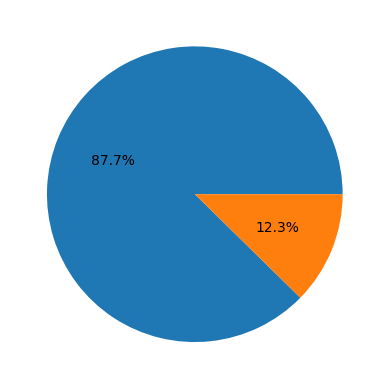

In [10]:
plt.pie(df['Conversion'].value_counts(), autopct='%1.1f%%')

dari data diatas, dapat disimpulkan ternyata campaign kita sukses besar, karena hanya ada sedikit orang saja yang belum terkonvert atau yang mengikuti perusahaan kita

<Axes: xlabel='Age', ylabel='Count'>

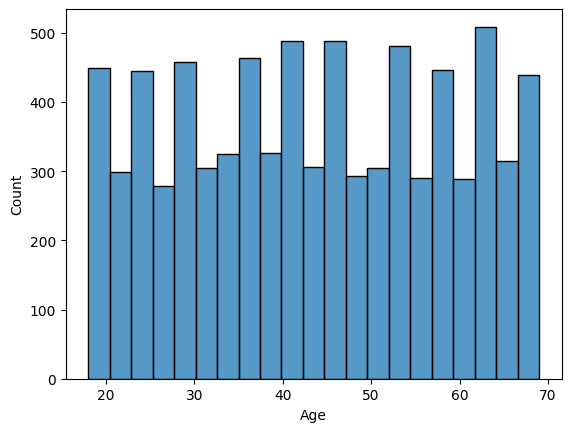

In [11]:
sns.histplot(df['Age'])

dapat dilihat dari grafik diatas, ternyata kolom umur memiliki distribusi yang normal

<Axes: xlabel='Conversion', ylabel='AdSpend'>

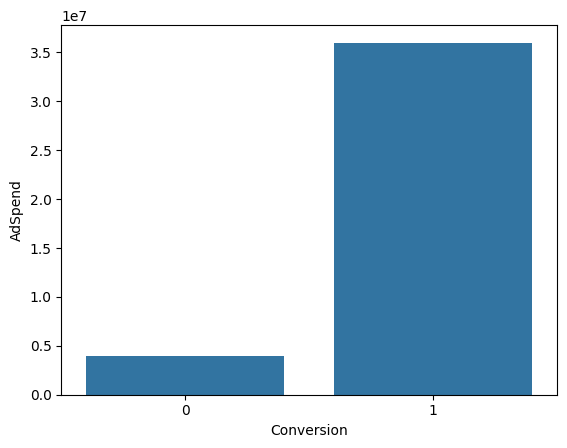

In [12]:
sns.barplot(df.groupby('Conversion')['AdSpend'].sum())

dari grafik diatas, dapat kita lihat, ternyata campaign kali ini lebih banyak disukai perempuan daripada laki-laki

In [13]:
df.groupby('Conversion')['EmailOpens'].sum()

Conversion
0     7486
1    68329
Name: EmailOpens, dtype: int64

([<matplotlib.patches.Wedge at 0x284767a53a0>,
 [Text(1.0474991311080946, 0.3357760717022388, ''),
  Text(-1.0474991153892812, -0.3357761207392115, '')],
 [Text(0.571363162422597, 0.1831505845648575, '9.9%'),
  Text(-0.5713631538486987, -0.18315061131229715, '90.1%')])

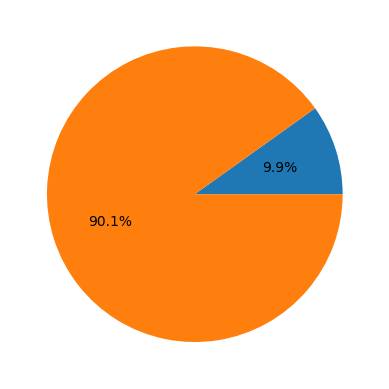

In [14]:
plt.pie(df.groupby('Conversion')['EmailOpens'].sum(),autopct='%1.1f%%')

<Axes: xlabel='CampaignChannel', ylabel='Count'>

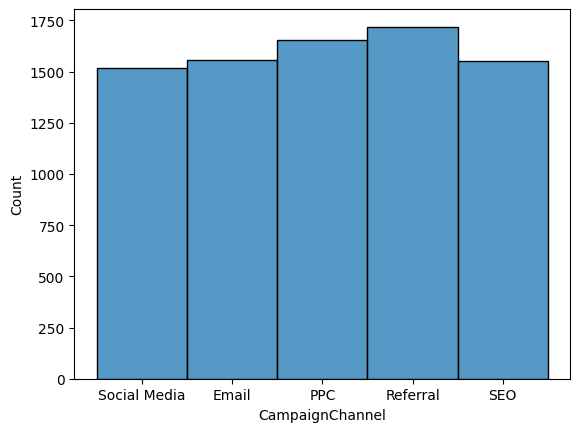

In [15]:
sns.histplot(df['CampaignChannel'])

dari campaign yang telah kita lakukan, ternyata campaign kita lebih bagus pada channel refferal dan PPC

In [16]:
df.columns

Index(['Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType', 'AdSpend',
       'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit',
       'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks',
       'PreviousPurchases', 'LoyaltyPoints', 'AdvertisingPlatform',
       'AdvertisingTool', 'Conversion'],
      dtype='object')

In [17]:
df['Conversion'].value_counts()

Conversion
1    7012
0     988
Name: count, dtype: int64

In [18]:
df.isnull().sum()

Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

dapat kita lihat disini ternyata tidak ada mising value di setiapp kolom

# Feature Engineering

## split train-test

In [19]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop('Conversion', axis=1)
y = df['Conversion'] #yang di prediksi

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, stratify=y)

In [20]:
X_train

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool
4549,47,Male,67059,Referral,Consideration,4230.695787,0.207306,0.071371,31,4.531457,0.914454,4,7,6,6,340,IsConfid,ToolConfid
6762,62,Female,46013,Email,Conversion,6896.542641,0.166986,0.020678,4,2.047647,5.980637,51,0,6,1,4828,IsConfid,ToolConfid
2111,43,Male,122757,Referral,Retention,343.668755,0.280081,0.184747,19,7.040791,9.633229,17,9,4,2,3048,IsConfid,ToolConfid
2844,49,Female,89290,Email,Awareness,6253.515621,0.140247,0.188328,44,5.735347,0.619781,89,1,7,3,4190,IsConfid,ToolConfid
1139,51,Male,41199,PPC,Awareness,1619.026589,0.200102,0.128892,46,9.926349,10.709364,94,13,3,4,2583,IsConfid,ToolConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,58,Female,76305,Email,Consideration,9912.860302,0.065985,0.129897,38,7.283893,4.402955,12,3,7,7,2318,IsConfid,ToolConfid
6801,66,Female,118997,PPC,Awareness,9236.801716,0.220639,0.135507,14,6.812168,7.215665,47,9,7,9,575,IsConfid,ToolConfid
4552,56,Female,20393,PPC,Retention,8471.605992,0.071373,0.146320,19,7.051460,8.662947,79,3,2,1,2613,IsConfid,ToolConfid
3137,48,Female,68702,Email,Awareness,7514.013250,0.122320,0.147416,30,2.050339,4.252331,28,3,8,3,1311,IsConfid,ToolConfid


In [21]:
y_train

4549    1
6762    1
2111    1
2844    1
1139    1
       ..
1021    1
6801    1
4552    1
3137    1
5303    1
Name: Conversion, Length: 6400, dtype: int64

In [22]:
y_test

4754    1
7545    0
1393    1
7068    1
2774    1
       ..
4727    1
2644    1
7334    0
6068    0
769     1
Name: Conversion, Length: 1600, dtype: int64

dari y disini saya menyimpulkan kalon yang '1' itu bersifat positif, dan yang '0' bersifat negatif. kenapa seperti itu, karena target saya adalah saya ingin melihat siapa saja yang bulan depan masih ada tunggakan

## Feature Selection

In [23]:
# Selecting numerical and categorical columns
num_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print('Categorical Columns: ', cat_columns)
print('Numerical Columns: ', num_columns)

Categorical Columns:  ['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform', 'AdvertisingTool']
Numerical Columns:  ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']


In [24]:
# Splitting the train and test features into categorical and numerical columns
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_cat.head()

,Gender,CampaignChannel,CampaignType,AdvertisingPlatform,AdvertisingTool
4549,Male,Referral,Consideration,IsConfid,ToolConfid
6762,Female,Email,Conversion,IsConfid,ToolConfid
2111,Male,Referral,Retention,IsConfid,ToolConfid
2844,Female,Email,Awareness,IsConfid,ToolConfid
1139,Male,PPC,Awareness,IsConfid,ToolConfid


In [25]:
list(cat_columns)

['Gender',
 'CampaignChannel',
 'CampaignType',
 'AdvertisingPlatform',
 'AdvertisingTool']

pada cell code diatas saya memisahkan kolom kategori dan numerical karena akan saya coba untuk scalling dan encode(karena data kategorikalnya sudah di encode maka saya tidak akan melakukan encoding)

In [26]:
#Finding the correlation between categorical columns and Y Train using Kendall Tau's correlation
p_values = []
interpretation = []
cols = []
corr = []
selected_cat_cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  if corr_coef > 0.1 or corr_coef < -0.1:
    interpretation.append('Significant')
    selected_cat_cols.append(col)
  else :
    interpretation.append('Not Significant')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Correlation': interpretation })

,Column Name,Correlation Coefficient,P-value,Correlation
0,Gender,-0.005532,0.658119,Not Significant
1,CampaignChannel,-0.006372,0.568775,Not Significant
2,CampaignType,0.030486,0.007557,Not Significant
3,AdvertisingPlatform,NaN,NaN,Not Significant
4,AdvertisingTool,NaN,NaN,Not Significant


setelah saya melakukan pengecekan korelasi, ternyata tidak ada kolom yang berkolerasi

In [27]:
#Finding the correlation between numerical columns and Y Train using pearsonr and spearmanr correlation
p_values = []
interpretation = []
cols = []
corr = []
selected_num_cols = []

for col in X_train_num.columns:
  if abs(X_train_num[col].skew()) < 0.1:
    #For Normally Distributed Columns
    corr_coef, p_value = pearsonr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if corr_coef > 0.1 or corr_coef < -0.1:
      interpretation.append('Significant')
      selected_num_cols.append(col)
    else :
      interpretation.append('Not Significant')
  else:
    #For Skewed Columns
    corr_coef, p_value = spearmanr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if corr_coef > 0.1 or corr_coef < -0.1:
      interpretation.append('Significant')
      selected_num_cols.append(col)
    else :
      interpretation.append('Not Significant')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Correlation': interpretation })

,Column Name,Correlation Coefficient,P-value,Correlation
0,Age,0.001054,9.328046e-01,Not Significant
1,Income,0.022907,6.688734e-02,Not Significant
2,AdSpend,0.119720,7.231966e-22,Significant
3,ClickThroughRate,0.116160,1.135422e-20,Significant
4,ConversionRate,0.089739,6.372837e-13,Not Significant
5,WebsiteVisits,0.080079,1.404907e-10,Not Significant
6,PagesPerVisit,0.090237,4.749463e-13,Not Significant
7,TimeOnSite,0.137332,2.541841e-28,Significant
8,SocialShares,-0.014781,2.370803e-01,Not Significant
9,EmailOpens,0.120602,3.608780e-22,Significant


saya juga melakukan pengecekan korelasi kepada yang numeric ternyata hanya ada 6 kolom/ 6 factor yang mempengaruhi prediksi kita

In [28]:
print(selected_cat_cols)
print(selected_num_cols)

[]
['AdSpend', 'ClickThroughRate', 'TimeOnSite', 'EmailOpens', 'EmailClicks', 'PreviousPurchases']


In [29]:
#Mengupdate kolom numerikal dan kategorikal
X_train_cat = X_train_cat[selected_cat_cols]
X_train_num = X_train_num[selected_num_cols]

X_test_cat = X_test_cat[selected_cat_cols]
X_test_num = X_test_num[selected_num_cols]

#melihat 5 baris pertama x_train setelah diupdate
X_train_num.head()

,AdSpend,ClickThroughRate,TimeOnSite,EmailOpens,EmailClicks,PreviousPurchases
4549,4230.695787,0.207306,0.914454,7,6,6
6762,6896.542641,0.166986,5.980637,0,6,1
2111,343.668755,0.280081,9.633229,9,4,2
2844,6253.515621,0.140247,0.619781,1,7,3
1139,1619.026589,0.200102,10.709364,13,3,4


In [30]:
X_train_num.head()

,AdSpend,ClickThroughRate,TimeOnSite,EmailOpens,EmailClicks,PreviousPurchases
4549,4230.695787,0.207306,0.914454,7,6,6
6762,6896.542641,0.166986,5.980637,0,6,1
2111,343.668755,0.280081,9.633229,9,4,2
2844,6253.515621,0.140247,0.619781,1,7,3
1139,1619.026589,0.200102,10.709364,13,3,4


In [31]:
X_train_final = np.concatenate([X_train_cat, X_train_num], axis=1)
X_test_final = np.concatenate([X_test_cat, X_test_num], axis=1)

# Get the column names
column_names =  list(X_train_cat.columns) + list(X_train_num.columns)

# Create DataFrames with column names
X_train_final1 = pd.DataFrame(X_train_final, columns=column_names)
X_test_final2 = pd.DataFrame(X_test_final, columns=column_names)

In [32]:
X_train_final1

,AdSpend,ClickThroughRate,TimeOnSite,EmailOpens,EmailClicks,PreviousPurchases
0,4230.695787,0.207306,0.914454,7.0,6.0,6.0
1,6896.542641,0.166986,5.980637,0.0,6.0,1.0
2,343.668755,0.280081,9.633229,9.0,4.0,2.0
3,6253.515621,0.140247,0.619781,1.0,7.0,3.0
4,1619.026589,0.200102,10.709364,13.0,3.0,4.0
...,...,...,...,...,...,...
6395,9912.860302,0.065985,4.402955,3.0,7.0,7.0
6396,9236.801716,0.220639,7.215665,9.0,7.0,9.0
6397,8471.605992,0.071373,8.662947,3.0,2.0,1.0
6398,7514.013250,0.122320,4.252331,3.0,8.0,3.0


In [33]:
smote = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=42)     # Minority Class will have same the same number as the majority class
# smote = SMOTE(sampling_strategy={1:1000}, k_neighbors=5, random_state=42)     # Minority Class will have 1000 data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_final1, y_train)
y_train_balanced.value_counts()

Conversion
1    5610
0    5610
Name: count, dtype: int64

alasan saya melakukan data balancing diatas, karena data yang saya punya, sangatlah imbalance, jadi saya memutuskan untuk meoversampling datanya agar saat pembuatan model kita bisa mendapatkan best fit

In [34]:
X_train_balanced

,AdSpend,ClickThroughRate,TimeOnSite,EmailOpens,EmailClicks,PreviousPurchases
0,4230.695787,0.207306,0.914454,7.000000,6.000000,6.000000
1,6896.542641,0.166986,5.980637,0.000000,6.000000,1.000000
2,343.668755,0.280081,9.633229,9.000000,4.000000,2.000000
3,6253.515621,0.140247,0.619781,1.000000,7.000000,3.000000
4,1619.026589,0.200102,10.709364,13.000000,3.000000,4.000000
...,...,...,...,...,...,...
11215,1341.175830,0.123623,12.073165,9.887897,1.528026,3.848090
11216,6510.837881,0.068188,5.796382,18.897428,7.973007,0.000000
11217,3981.570974,0.149348,3.868897,3.337010,6.005515,4.011029
11218,2024.489572,0.099458,5.195317,16.616772,0.082120,4.945253


# pipeline

In [35]:
selected_num_cols

['AdSpend',
 'ClickThroughRate',
 'TimeOnSite',
 'EmailOpens',
 'EmailClicks',
 'PreviousPurchases']

In [36]:
from sklearn.metrics import make_scorer, recall_score, precision_score

custom_precision_scorer = make_scorer(precision_score, pos_label=1) #ini adalah fungsi yang akan saya gunakan untuk melihat skor dari hasil cross validation nanti

In [37]:
numeric_features = selected_num_cols
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, numeric_features)]
)

kolom transformer diatas dibuat untuk memasukan beberapa fitur yang dipilih, dan step-step untuk modeling

In [38]:
ds = Pipeline([('preprocessorr', preprocessor), ('DecisionTree', DecisionTreeClassifier())])
rf = Pipeline([('preprocessorr', preprocessor), ('Ra+ndomForest', RandomForestClassifier())])
boost = Pipeline([('preprocessorr', preprocessor), ('AdaBoost', AdaBoostClassifier())])
knn = Pipeline([('preprocessorr', preprocessor), ('knn', KNeighborsClassifier())])
svm = Pipeline([('preprocessorr', preprocessor), ('svm', SVC())])

dalam kasus ini daya akan mencoba lima model untuk melihat model mana yang terbaik untuk data saya

In [39]:
ds.fit(X_train_balanced, y_train_balanced)
rf.fit(X_train_balanced, y_train_balanced)
boost.fit(X_train_balanced, y_train_balanced)
knn.fit(X_train_balanced, y_train_balanced)
svm.fit(X_train_balanced, y_train_balanced)

c:\Users\USER\miniconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('preprocessorr',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AdSpend',
                                                   'ClickThroughRate',
                                                   'TimeOnSite', 'EmailOpens',
                                                   'EmailClicks',
                                                   'PreviousPurchases'])])),
                ('svm', SVC())])

In [40]:
# checking cross validation score
cv_svm_model = cross_val_score(svm, X_train, y_train, cv=3, scoring="precision")
cv_ds_model = cross_val_score(ds, X_train, y_train, cv=3, scoring="precision")
cv_boost_model = cross_val_score(boost, X_train, y_train, cv=3, scoring="precision")
cv_rf_model = cross_val_score(rf, X_train, y_train, cv=3, scoring="precision")
cv_knn_model = cross_val_score(knn, X_train, y_train, cv=3, scoring="precision")
name_model = []
cv_scores=0
for cv,name in zip([cv_ds_model,cv_svm_model, cv_boost_model, cv_rf_model, cv_knn_model],['ds_model','svm_model','boost_model','rf_model','knn_model']):
    print(name)
    print('precision - All - Cross Validation  : ', cv)
    print('precision - Mean - Cross Validation : ', cv.mean())
    print('precision - Std - Cross Validation  : ', cv.std())
    print('precision - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

c:\Users\USER\miniconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\USER\miniconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\USER\miniconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ds_model
precision - All - Cross Validation  :  [0.8984417  0.90458015 0.89967285]
precision - Mean - Cross Validation :  0.9008982323071031
precision - Std - Cross Validation  :  0.0026515825045022585
precision - Range of Test-Set       :  0.8982466498026008 - 0.9035498148116053
--------------------------------------------------
svm_model
precision - All - Cross Validation  :  [0.88013214 0.87947269 0.88041431]
precision - Mean - Cross Validation :  0.8800063811501889
precision - Std - Cross Validation  :  0.0003945655099190566
precision - Range of Test-Set       :  0.8796118156402699 - 0.8804009466601079
--------------------------------------------------
boost_model
precision - All - Cross Validation  :  [0.88702729 0.88777459 0.89198272]
precision - Mean - Cross Validation :  0.8889281990319159
precision - Std - Cross Validation  :  0.0021813113045145186
precision - Range of Test-Set       :  0.8867468877274014 - 0.8911095103364304
--------------------------------------------------


dari pengecekan crossvalidation diatas, dapat kita lihat, ternyata model yang terbaik bagi data saya adalah decision tree

In [41]:
params = {'DecisionTree__criterion':['gini', 'entropy', 'log_loss'],
          'DecisionTree__max_depth':[2,4,6,7,8,10,12,14,16,18,20],
          'DecisionTree__min_samples_split':[2,3,4,5,6,7,8,9,10],
          'DecisionTree__min_samples_leaf':[2,3,4,5,6,7,8,9,10]}

ds1 = GridSearchCV(estimator=ds,param_grid=params,cv=3, n_jobs=-1,scoring=custom_precision_scorer)
ds1.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessorr',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['AdSpend',
                                                                          'ClickThroughRate',
                                                                          'TimeOnSite',
                                                                          'EmailOpens',
                                                                          'EmailClicks',
                                                                          'PreviousPurchases'])])),
                                       ('DecisionTree',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'DecisionTree__criterion': ['gini', 'entropy',
                                                     'log_loss'],
                         'DecisionTree__max_depth': [2, 4, 6, 7, 8, 10, 12, 14,
                                                     16, 18, 20],
                         'DecisionTree__min_samples_leaf': [2, 3, 4, 5, 6, 7, 8,
                                                            9, 10],
                         'DecisionTree__min_samples_split': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10]},
             scoring=make_scorer(precision_score, response_method='predict', pos_label=1))

setelah saya mengetahui bahwa model decision tree itu adalah model yang terbaik, maka saya akan melakukan hyper parameter tuning, untuk melihat parameter apa saja yang cocok untuk digunakan

In [42]:
ds1.best_params_

{'DecisionTree__criterion': 'entropy',
 'DecisionTree__max_depth': 20,
 'DecisionTree__min_samples_leaf': 2,
 'DecisionTree__min_samples_split': 2}

dan diatas adalah beberapa parameter yang cocok untuk model saya

In [43]:
ds1.scorer_

make_scorer(precision_score, response_method='predict', pos_label=1)

In [44]:
ds1.best_score_

0.8645590276801647

In [45]:
ds_df = pd.DataFrame(ds1.cv_results_)

In [46]:
ds_df.query('rank_test_score <= 10')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_DecisionTree__criterion,param_DecisionTree__max_depth,param_DecisionTree__min_samples_leaf,param_DecisionTree__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1701,2.022419,0.628273,0.065390,0.087371,entropy,20,2,2,"{'DecisionTree__criterion': 'entropy', 'Decisi...",0.731374,0.933824,0.928479,0.864559,0.094201,1
1702,1.291406,0.480223,0.117386,0.149858,entropy,20,2,3,"{'DecisionTree__criterion': 'entropy', 'Decisi...",0.726711,0.929803,0.924936,0.860483,0.094612,10
1703,2.513210,0.408479,0.168889,0.021968,entropy,20,2,4,"{'DecisionTree__criterion': 'entropy', 'Decisi...",0.730546,0.931288,0.924649,0.862161,0.093105,4
1704,1.492314,0.446367,0.154056,0.129678,entropy,20,2,5,"{'DecisionTree__criterion': 'entropy', 'Decisi...",0.723657,0.933416,0.925127,0.860733,0.096986,9
1706,1.416366,0.242517,0.110447,0.130703,entropy,20,2,7,"{'DecisionTree__criterion': 'entropy', 'Decisi...",0.726415,0.931076,0.924906,0.860799,0.095057,8
1708,1.413906,0.161265,0.427674,0.302579,entropy,20,2,9,"{'DecisionTree__criterion': 'entropy', 'Decisi...",0.726937,0.928486,0.927239,0.860887,0.094718,7
2593,1.436665,0.180366,0.059046,0.060961,log_loss,20,2,3,"{'DecisionTree__criterion': 'log_loss', 'Decis...",0.729529,0.933538,0.924588,0.862552,0.094133,3
2594,1.913779,0.170469,0.015257,0.003896,log_loss,20,2,4,"{'DecisionTree__criterion': 'log_loss', 'Decis...",0.727160,0.938233,0.923369,0.862921,0.096189,2
2595,1.353908,0.219624,0.051177,0.054658,log_loss,20,2,5,"{'DecisionTree__criterion': 'log_loss', 'Decis...",0.724548,0.933047,0.927796,0.861797,0.097073,5
2597,1.134407,0.270291,0.014804,0.003603,log_loss,20,2,7,"{'DecisionTree__criterion': 'log_loss', 'Decis...",0.726787,0.934676,0.923511,0.861658,0.095477,6


setelah saya tuning, saya melakukan pengecekan ganda lagi, membandingkan score parameter yang sudah di tunning dan parameter default. ternyata parameter default lebih bagus ketimbang parameter yang dicari oleh grid search

In [47]:
ds.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('preprocessorr',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AdSpend',
                                                   'ClickThroughRate',
                                                   'TimeOnSite', 'EmailOpens',
                                                   'EmailClicks',
                                                   'PreviousPurchases'])])),
                ('DecisionTree', DecisionTreeClassifier())])

In [48]:
train = ds.predict(X_train_balanced)
test = ds.predict(X_test_final2)

In [49]:
print(classification_report(y_train_balanced, train))
print(classification_report(y_test, test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5610
           1       1.00      1.00      1.00      5610

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220

              precision    recall  f1-score   support

           0       0.25      0.33      0.29       198
           1       0.90      0.86      0.88      1402

    accuracy                           0.80      1600
   macro avg       0.58      0.60      0.59      1600
weighted avg       0.82      0.80      0.81      1600



dalam data saya 0 itu sama dengan kelas positif, dan 1 itu adalah kelas negatif. dan dapat kita lihat disini ternyata model decision tree ini berhasil melakukan prediksi yang sangat bagus di matrix precisio(karena saya ingin mengurangi orang-orang yang belum convertt, tapi dinyatakan sudah), dan terlihat juga perbandingan data yang sudah di balance dan yang tidak balance terlihat sangat jauh sekali perbedaaanya

In [51]:
cm_train = confusion_matrix(y_train_balanced, train)

print('Confusion Matrix : \n', cm_train)

Confusion Matrix : 
 [[5610    0]
 [   0 5610]]


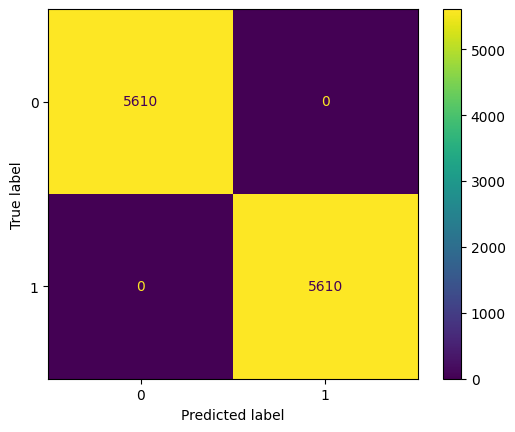

In [52]:
ConfusionMatrixDisplay(cm_train).plot()

In [54]:
cm_test = confusion_matrix(y_test, test)

print('Confusion Matrix : \n', cm_train)

Confusion Matrix : 
 [[  66  132]
 [ 193 1209]]


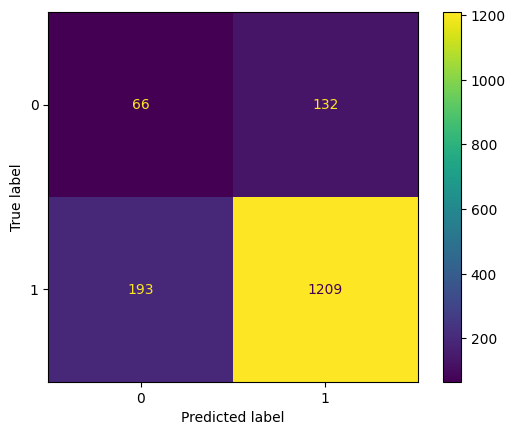

In [55]:
ConfusionMatrixDisplay(cm_test).plot()

# Model Saving

In [109]:
import joblib

joblib.dump(ds, 'pipe.joblib')

['pipe.joblib']

# Pengambilan kesimpulan

jadi kesimpulannya adalah jika data saya imbalance maka saya akan mendapatkan performa yang buruk, maka darin itu saya melakukan data balancing agar model yang nanti akan saya suruh belajar terhadapn data saya, bisa memberikan performa yang bagus. setelah saya melakukan data balncing saya menggunakan 5 model dan saya mendapatkan model decision tree seebagai model yang terbaik. ternyata decision tree bisa memprediksi model saya dengan sangat baik, sehingga mendapatkan best fit